# Data Visualization

You can use `matplotlib` and `seaborn` to visualize data. For better performance, you should use `numpy` to convert list data to `ndarray` collection.

## 1 Install Python packages

You may need to install the following libraries if you haven't installed the Python packages. 

- In Windows, run commands:  `pip install matplotlib` and `pip install seaborn` 
- In MacOS, run commands: `pip3 install matplotlib` and `pip3 install seaborn`

## 2 Display Dice Rolling

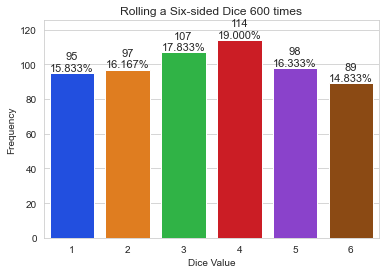

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

rolls = [random.randrange(1, 7) for i in range(600)]
values, frequencies = np.unique(rolls, return_counts = True)

sns.set_style('whitegrid')
axes = sns.barplot(x=values, y=frequencies, palette='bright')

title = f'Rolling a Six-sided Dice {len(rolls):,} times'
axes.set_title(title)
axes.set(xlabel='Dice Value', ylabel='Frequency')

# make some space for text above the bar top
axes.set_ylim(top = max(frequencies) * 1.10)

# show frequency and % for each bar
for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = f'{frequency:,}\n{frequency / len(rolls):.3%}'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

plt.show()

## 3 Dynamic Visualization

The following animation code doesn't work as a Python note code in VS Code. Please copy, paste the code and run it from a separate `.py` file. 

```python
from matplotlib import animation
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys

NUMBER_OF_FRAMES = 600
ROLLS_PER_FRAME = 10

# this function is called by animation to render each frame
# the first argument frame_number is provided by animation
def update(frame_number, faces, frequencies):
    for _ in range(ROLLS_PER_FRAME):  # roll the dice for the specified times
        dice_key = random.randrange(1, 7) - 1
        frequencies[dice_key] += 1
    
    plt.cla() # clear old content
    axes = sns.barplot(x=faces, y=frequencies, palette='bright')
    total_rolls = sum(frequencies)
    title = f'Dice frequencies for {total_rolls:,} rolls'
    axes.set_title(title)
    axes.set(xlabel='Dice Value', ylabel='Frequency')
    
    # make some space for text above the bar top
    axes.set_ylim(top = max(frequencies) * 1.10)
    
    # show frequency and % for each bar
    for bar, frequency in zip(axes.patches, frequencies):
        text_x = bar.get_x() + bar.get_width() / 2.0
        text_y = bar.get_height()
        text = f'{frequency:,}\n{frequency / total_rolls:.3%}'
        axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

sns.set_style('whitegrid')
figure = plt.figure('Rolling a Sixe-sided Dice')
values = list(range(1, 7))
frequencies = [0] * 6

die_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames=NUMBER_OF_FRAMES, interval=33,
    fargs=(values, frequencies)
)

plt.show()
```